In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [90]:
# warning 안뜨게하기

import warnings
warnings.filterwarnings(action='ignore')

In [132]:
# 한글 encoding

# utf-8
# euckr
# cp949 == ansi

# matplotlib 한글 깨짐 방지
import matplotlib as mpl
import matplotlib.font_manager as fm

mpl.rcParams['axes.unicode_minus'] = False

path = 'C:/Windows/Fonts/malgun.ttf'
font_name = fm.FontProperties(fname=path, size=50).get_name()
plt.rc('font', family=font_name)

In [53]:
# data.go.kr
df = pd.read_csv('./datafiles/주택도시보증공사_전국 신규 민간아파트 분양가격 동향_20211031.csv', encoding='ansi')

In [54]:
df.head()

,지역명,규모구분,연도,월,분양가격(제곱미터)
0,서울,모든면적,2015,10,5841
1,서울,전용면적 60제곱미터이하,2015,10,5652
2,서울,전용면적 60제곱미터초과 85제곱미터이하,2015,10,5882
3,서울,전용면적 85제곱미터초과 102제곱미터이하,2015,10,5721
4,서울,전용면적 102제곱미터초과,2015,10,5879


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6205 entries, 0 to 6204
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   지역명         6205 non-null   object
 1   규모구분        6205 non-null   object
 2   연도          6205 non-null   int64 
 3   월           6205 non-null   int64 
 4   분양가격(제곱미터)  5734 non-null   object
dtypes: int64(2), object(3)
memory usage: 242.5+ KB


In [56]:
df.isna().sum()

지역명             0
규모구분            0
연도              0
월               0
분양가격(제곱미터)    471
dtype: int64

In [57]:
df.loc[df['분양가격(제곱미터)'].isna()]

,지역명,규모구분,연도,월,분양가격(제곱미터)
368,광주,전용면적 85제곱미터초과 102제곱미터이하,2016,2,NaN
369,광주,전용면적 102제곱미터초과,2016,2,NaN
374,대전,전용면적 102제곱미터초과,2016,2,NaN
388,강원,전용면적 85제곱미터초과 102제곱미터이하,2016,2,NaN
421,제주,전용면적 60제곱미터이하,2016,2,NaN
...,...,...,...,...,...
5984,대전,전용면적 102제곱미터초과,2021,8,NaN
5989,울산,전용면적 102제곱미터초과,2021,8,NaN
6018,전남,전용면적 85제곱미터초과 102제곱미터이하,2021,8,NaN
6031,제주,전용면적 60제곱미터이하,2021,8,NaN


In [94]:
# NaN값 제거
df.dropna(inplace = True)

In [95]:
df.isna().sum()

지역명           0
규모구분          0
연도            0
월             0
분양가격(제곱미터)    0
dtype: int64

In [100]:
df['분양가격(제곱미터)'].dtypes

dtype('O')

In [101]:
# astype() : df의 type를 바꿔준다
# float변경이 불가능한 데이터 타입이 존재하므로 에러가 난다
df['분양가격(제곱미터)'].astype('float')

ValueError: could not convert string to float: ''

In [102]:
# 데이터 전처리 (좌우공백)과 (',')없애기
df['분양가격(제곱미터)'] = df['분양가격(제곱미터)'].apply(lambda x : str(x).strip().replace(',',''))

In [103]:
df['분양가격(제곱미터)']

0       5841
1       5652
2       5882
3       5721
4       5879
        ... 
6200    6860
6201       -
6202    6787
6203    5924
6204    6815
Name: 분양가격(제곱미터), Length: 6205, dtype: object

In [106]:
# float변경이 가능한 값은 index값을 담아주고 , 변경이 불가능하면 erros에 담아준다
idexes = []
errors = []
for i , j in enumerate(df['분양가격(제곱미터)']):
    try:
        float(j)
        idexes.append(i)
    except:
        errors.append(j)

In [107]:
errors

['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-']

In [108]:
# float변경이 가능한 값들의 index로만 새로운 dataframe를 만들어 준다.
df_clean = df.iloc[idexes]

In [109]:
# astype() : df의 type를 바꿔준다
df_clean['분양가격(제곱미터)'] = df_clean['분양가격(제곱미터)'].astype('float')

In [110]:
df_clean['평당분양가'] = df_clean['분양가격(제곱미터)'] * 3.3

In [111]:
df_clean

,지역명,규모구분,연도,월,분양가격(제곱미터),평당분양가
0,서울,모든면적,2015,10,5841.0,19275.3
1,서울,전용면적 60제곱미터이하,2015,10,5652.0,18651.6
2,서울,전용면적 60제곱미터초과 85제곱미터이하,2015,10,5882.0,19410.6
3,서울,전용면적 85제곱미터초과 102제곱미터이하,2015,10,5721.0,18879.3
4,서울,전용면적 102제곱미터초과,2015,10,5879.0,19400.7
...,...,...,...,...,...,...
6199,경남,전용면적 102제곱미터초과,2021,10,3599.0,11876.7
6200,제주,모든면적,2021,10,6860.0,22638.0
6202,제주,전용면적 60제곱미터초과 85제곱미터이하,2021,10,6787.0,22397.1
6203,제주,전용면적 85제곱미터초과 102제곱미터이하,2021,10,5924.0,19549.2


In [114]:
# unique()  :   칼럼에 존재하는 값들을 중복없이 보여준다

df_clean['규모구분'].unique()

array(['모든면적', '전용면적 60제곱미터이하', '전용면적 60제곱미터초과 85제곱미터이하',
       '전용면적 85제곱미터초과 102제곱미터이하', '전용면적 102제곱미터초과'], dtype=object)

In [122]:
df_clean['규모구분'] = df_clean['규모구분'].str.replace('전용면적 ','')
df_clean['규모구분'] = df_clean['규모구분'].str.replace('제곱미터','')
df_clean['규모구분'] = df_clean['규모구분'].str.replace('이하','')
df_clean['규모구분'] = df_clean['규모구분'].str.replace('초과',' ~')
df_clean['규모구분']

0          모든면적
1            60
2        60~ 85
3       85~ 102
4          102~
         ...   
6199       102~
6200       모든면적
6202     60~ 85
6203    85~ 102
6204       102~
Name: 규모구분, Length: 6174, dtype: object

In [123]:
df_clean.drop('분양가격(제곱미터)', axis = 1, inplace=True)

In [126]:
df_clean.head()

,지역명,규모구분,연도,월,평당분양가
0,서울,모든면적,2015,10,19275.3
1,서울,60,2015,10,18651.6
2,서울,60~ 85,2015,10,19410.6
3,서울,85~ 102,2015,10,18879.3
4,서울,102~,2015,10,19400.7


In [127]:
dfc = df_clean

<AxesSubplot:xlabel='지역명'>

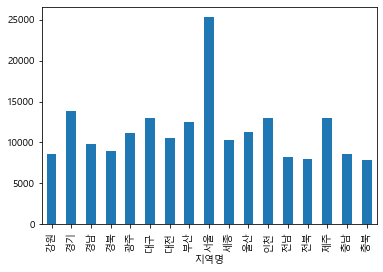

In [133]:
# 지역별 평당 평균 분양가격
dfc.groupby('지역명')['평당분양가'].mean().plot(kind = 'bar')

<AxesSubplot:xlabel='지역명'>

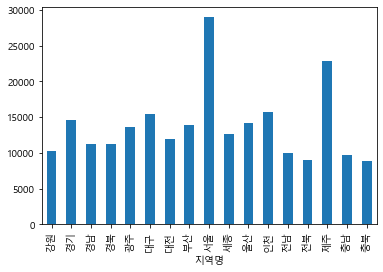

In [139]:
# 2021년도의 지역별 평당 분양가 평균
dfc[dfc['연도'] == 2021].groupby('지역명')['평당분양가'].mean().plot(kind='bar')

In [140]:
# 2015 ~ 2021년 사이 지역별 분양가 변화를 line chart로 그리시오
df_clean['연도'].unique()

array([2015, 2016, 2017, 2018, 2019, 2020, 2021], dtype=int64)

<AxesSubplot:xlabel='연도'>

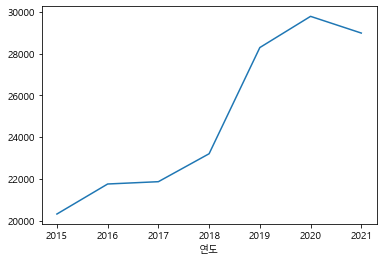

In [142]:
dfc[dfc['지역명'] == '서울'].groupby('연도')['평당분양가'].mean().plot()

<AxesSubplot:xlabel='연도'>

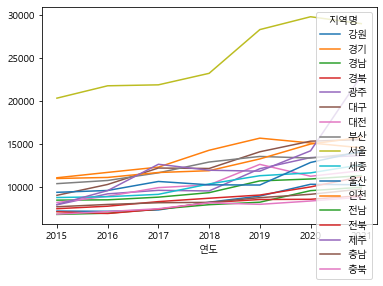

In [188]:
dfc.groupby(['지역명','연도'])['평당분양가'].mean().unstack().T.plot()

<AxesSubplot:>

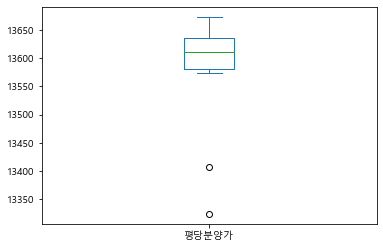

In [200]:
# 각 년도에 월별 분양가 box chart로 그리기
dfc[dfc.연도==2021].groupby('월')['평당분양가'].mean().plot(kind='box')

<AxesSubplot:>

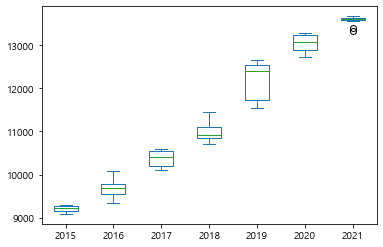

In [201]:
dfc.groupby(['월','연도'])['평당분양가'].mean().unstack().plot(kind = 'box')

<AxesSubplot:xlabel='월'>

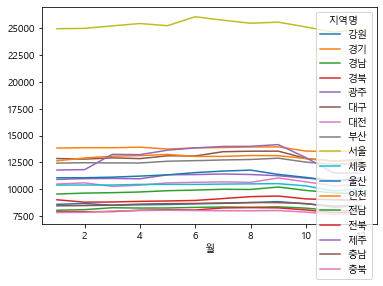

In [211]:
dfc.groupby(['지역명','월'])['평당분양가'].mean().unstack().T.plot()